### Importação dos dados



In [65]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [66]:
#CALCULAR O FATURAMENTO TOTAL POR LOJA
import pandas as pd

# Carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

lojas = [pd.read_csv(url) for url in urls]

# Converter 'Data da Compra' para datetime
for loja in lojas:
    loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], format="%d/%m/%Y")

# Calcular o faturamento total por loja
faturamento_total = [loja["Preço"].sum() for loja in lojas]

print("FATURAMENTO TOTAL DE CADA LOJA")

print()

# Exibir resultados
for i, fat in enumerate(faturamento_total):
    print(f"Faturamento total da loja {i+1}: R$ {fat:.2f}")




FATURAMENTO TOTAL DE CADA LOJA

Faturamento total da loja 1: R$ 1534509.12
Faturamento total da loja 2: R$ 1488459.06
Faturamento total da loja 3: R$ 1464025.03
Faturamento total da loja 4: R$ 1384497.58


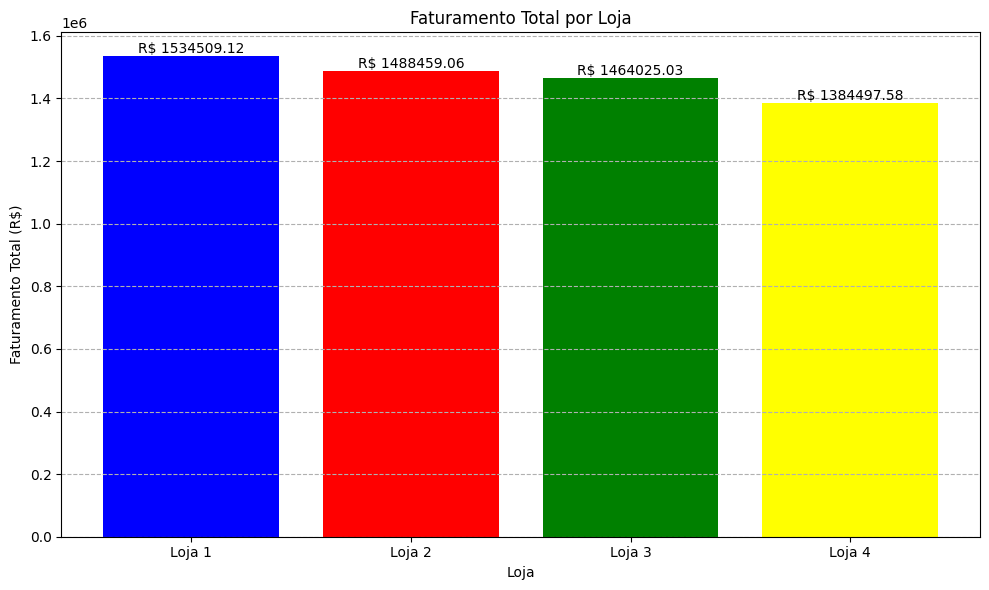

In [67]:
print()
#GRÁFICO COMPARATIVO DO FATURAMENTO TOTAL POR LOJA

import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

lojas = [pd.read_csv(url) for url in urls]

# Converter 'Data da Compra' para datetime
for loja in lojas:
    loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], format="%d/%m/%Y")

# Calcular o faturamento total por loja
faturamento_total = [loja["Preço"].sum() for loja in lojas]
nomes_lojas = [f"Loja {i+1}" for i in range(len(lojas))]
# Definir cores para as lojas
cores_lojas = ['blue', 'red', 'green', 'yellow'] # Adicionei essa linha para definir as cores

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(nomes_lojas, faturamento_total, color=cores_lojas)
plt.xlabel("Loja")
plt.ylabel("Faturamento Total (R$)")
plt.title("Faturamento Total por Loja")
plt.xticks(nomes_lojas)
plt.grid(axis='y', linestyle='--')

# Adicionar os valores sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'R$ {yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [68]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp

# Carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

lojas = [pd.read_csv(url) for url in urls]
nomes_lojas = [f"Loja {i+1}" for i in range(len(lojas))]
anos = sorted(pd.concat([loja['Data da Compra'].str[-4:].astype(int) for loja in lojas]).unique())
num_linhas = 2
num_colunas = 2

# Adicionar a coluna 'Loja' a cada DataFrame
for i, loja in enumerate(lojas):
    loja['Loja'] = nomes_lojas[i]

# Criar subplots
fig = sp.make_subplots(rows=num_linhas, cols=num_colunas, subplot_titles=[f"Ano {ano}" for ano in anos],
                        shared_xaxes=True, shared_yaxes=False, vertical_spacing=0.1,
                        specs=[[{'secondary_y': True} for _ in range(num_colunas)] for _ in range(num_linhas)])

# Cores para cada loja
cores_lojas = ['blue', 'red', 'green', 'yellow']

for i, ano in enumerate(anos):
    row = (i // num_colunas) + 1
    col = (i % num_colunas) + 1

    # Filtrar dados para o ano atual
    df_ano_completo = pd.concat([loja[loja['Data da Compra'].str[-4:].astype(int) == ano] for loja in lojas])

    # Calcular o faturamento total por categoria para o ano atual
    df_faturamento_ano = df_ano_completo.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

    top_3_categorias = df_faturamento_ano.head(3).index.tolist()
    bottom_3_categorias = df_faturamento_ano.tail(3).index.tolist()

    # Criar a ordem desejada das categorias no eixo X
    ordered_categories = top_3_categorias + bottom_3_categorias
    fig.update_xaxes(categoryorder='array', categoryarray=ordered_categories, row=row, col=col)

    # Encontrar o valor máximo das categorias menores para ajustar o eixo Y secundário
    max_faturamento_menor_ano = df_faturamento_ano[bottom_3_categorias].max() if bottom_3_categorias else 1
    # Ajustar a escala do eixo Y secundário
    scale_up_factor = 0.8
    upper_range_menor = max_faturamento_menor_ano * scale_up_factor
    fig.update_yaxes(title_text="Faturamento (Menor)", side="right", showgrid=False,
                     range=[0, upper_range_menor], row=row, col=col, secondary_y=True)
    fig.update_yaxes(title_text="Faturamento (Maior)", side="left", showgrid=True, row=row, col=col, secondary_y=False)

    for j, nome_loja in enumerate(nomes_lojas):
        # Filtrar dados para a loja e o ano atual
        df_loja_ano = df_ano_completo[df_ano_completo['Loja'] == nome_loja].groupby('Categoria do Produto')['Preço'].sum().fillna(0).reset_index()

        # Adicionar barras para as 3 maiores categorias
        categorias_maiores_loja = df_loja_ano[df_loja_ano['Categoria do Produto'].isin(top_3_categorias)]
        if not categorias_maiores_loja.empty:
            fig.add_trace(go.Bar(x=categorias_maiores_loja['Categoria do Produto'],
                                 y=categorias_maiores_loja['Preço'],
                                 name=f"{nome_loja} (Maior)", marker_color=cores_lojas[j], showlegend=(i == 0),
                                 legendgroup=nome_loja,
                                 hovertemplate=f"Loja: {nome_loja}Categoria: %{{x}}Faturamento: R$ %{{y:.2f}}"),
                          row=row, col=col, secondary_y=False)

        # Adicionar barras para as 3 menores categorias
        categorias_menores_loja = df_loja_ano[df_loja_ano['Categoria do Produto'].isin(bottom_3_categorias)]
        if not categorias_menores_loja.empty:
            fig.add_trace(go.Bar(x=categorias_menores_loja['Categoria do Produto'],
                                 y=categorias_menores_loja['Preço'],
                                 name=f"{nome_loja} (Menor)", marker_color=cores_lojas[j], showlegend=False,
                                 legendgroup=nome_loja,
                                 hovertemplate=f"Loja: {nome_loja}Categoria: %{{x}}Faturamento: R$ %{{y:.2f}}"),
                          row=row, col=col, secondary_y=True)

# Atualizar o layout
fig.update_layout(title_text='Faturamento das 3 Maiores e 3 Menores Categorias por Loja ao Longo dos Anos',
                  barmode='group')

fig.show()


In [69]:
import pandas as pd

# Criando uma lista para armazenar os resultados por loja
categorias_por_loja = []

for i, loja in enumerate(lojas):
    # Agrupando por categoria e somando a quantidade de vendas
    vendas_por_categoria = loja.groupby("Categoria do Produto")["Preço"].sum().reset_index()

    # Ordenando para encontrar as categorias mais e menos vendidas
    vendas_por_categoria = vendas_por_categoria.sort_values(by="Preço", ascending=False)

    # Selecionando as 3 mais vendidas e as 3 menos vendidas
    top_3 = vendas_por_categoria.head(3)
    bottom_3 = vendas_por_categoria.tail(3)

    # Adicionando a coluna da loja correspondente
    top_3.loc[:, "Loja"] = f"Loja {i+1}"
    bottom_3.loc[:, "Loja"] = f"Loja {i+1}"


    # Armazenando os resultados
    categorias_por_loja.append(top_3)
    categorias_por_loja.append(bottom_3)

# Concatenando todas as lojas em um único DataFrame
resultado_categorias = pd.concat(categorias_por_loja, ignore_index=True)

# Exibir resultados
from IPython.display import display
display(resultado_categorias)


/tmp/ipython-input-69-3148269777.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-69-3148269777.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-69-3148269777.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyth

,Categoria do Produto,Preço,Loja
0,eletronicos,572659.23,Loja 1
1,eletrodomesticos,484913.36,Loja 1
2,moveis,250178.11,Loja 1
3,brinquedos,23993.78,Loja 1
4,utilidades domesticas,16931.48,Loja 1
5,livros,11713.92,Loja 1
6,eletronicos,547773.71,Loja 2
7,eletrodomesticos,464758.13,Loja 2
8,moveis,235234.68,Loja 2
9,brinquedos,21262.21,Loja 2


# 3. Média de Avaliação das Lojas

In [70]:
import pandas as pd

# Criar uma lista para armazenar os resultados
avaliacao_por_loja = []

for i, loja in enumerate(lojas):
    # Calcular a média total da avaliação
    media_avaliacao = loja["Avaliação da compra"].mean()

    # Criar um DataFrame com os resultados
    df_avaliacao = pd.DataFrame({
        "Loja": [f"Loja {i+1}"],
        "Média Total da Avaliação": [round(media_avaliacao, 2)]
    })

    # Armazenar os resultados
    avaliacao_por_loja.append(df_avaliacao)

# Concatenar todas as lojas em um único DataFrame
resultado_avaliacao_total = pd.concat(avaliacao_por_loja, ignore_index=True)

# Exibir resultado
from IPython.display import display
display(resultado_avaliacao_total)


,Loja,Média Total da Avaliação
0,Loja 1,3.98
1,Loja 2,4.04
2,Loja 3,4.05
3,Loja 4,4.00


# 4. Produtos Mais e Menos Vendidos

In [71]:
import pandas as pd
from IPython.core.display import display, HTML

# URLs dos dados
urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

# Definir estilos CSS para melhorar a exibição
css_style = """

"""

# Exibir o CSS
display(HTML(css_style))

# Processar cada loja
for nome_loja, url in urls.items():
    # Carregar os dados
    loja_df = pd.read_csv(url)

    # Adicionar coluna identificando a loja
    loja_df["Loja"] = nome_loja

    # Contar a quantidade de vendas por produto e calcular faturamento total
    vendas_por_produto = loja_df.groupby("Produto")["Preço"].agg(["count", "sum"]).reset_index()
    vendas_por_produto.columns = ["Produto", "Quantidade Vendida", "Faturamento Total (R$)"]

    # Ordenar do mais vendido para o menos vendido
    vendas_por_produto = vendas_por_produto.sort_values(by="Quantidade Vendida", ascending=False)

    # Exibir os resultados organizados
    display(HTML(f'Ranking de Vendas - {nome_loja}'))
    display(vendas_por_produto)


,Produto,Quantidade Vendida,Faturamento Total (R$)
47,TV Led UHD 4K,60,189534.28
37,Micro-ondas,60,46348.89
24,Guarda roupas,60,39282.78
43,Secadora de roupas,58,78749.73
3,Blocos de montar,56,2487.74
17,Cômoda,56,20905.92
4,Bola de basquete,55,3666.88
2,Bicicleta,54,36592.38
14,Copo térmico,54,3284.68
23,Geladeira,54,149524.28


,Produto,Quantidade Vendida,Faturamento Total (R$)
28,Iniciando em programação,65,4169.96
37,Micro-ondas,62,48256.37
1,Bateria,61,61566.87
49,Violão,58,24864.13
40,Pandeiro,58,4967.00
43,Secadora de roupas,57,78820.31
12,Celular Plus X42,55,150967.83
24,Guarda roupas,54,34900.24
3,Blocos de montar,54,2385.91
30,Jogo de panelas,52,10619.48


,Produto,Quantidade Vendida,Faturamento Total (R$)
32,Kit banquetas,57,22265.96
36,Mesa de jantar,56,19101.40
9,Cama king,56,51779.90
17,Cômoda,55,20487.18
30,Jogo de panelas,55,11595.04
44,Smart TV,54,105116.46
21,Fogão,53,51430.37
39,Modelagem preditiva,53,4499.94
15,Corda de pular,53,1137.76
2,Bicicleta,52,32872.35


,Produto,Quantidade Vendida,Faturamento Total (R$)
8,Cama box,62,43928.57
20,Faqueiro,59,3532.16
9,Cama king,56,50073.16
18,Dashboards com Power BI,56,2654.28
17,Cômoda,55,20192.46
36,Mesa de jantar,55,17760.80
10,Carrinho controle remoto,55,5352.22
3,Blocos de montar,54,2546.40
44,Smart TV,54,110387.57
40,Pandeiro,52,4605.63


# 5. Frete Médio por Loja


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display

# Carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

lojas = [pd.read_csv(url) for url in urls]
nomes_lojas = [f"Loja {i+1}" for i in range(len(lojas))]
cores_lojas = ['blue', 'red', 'green', 'yellow']


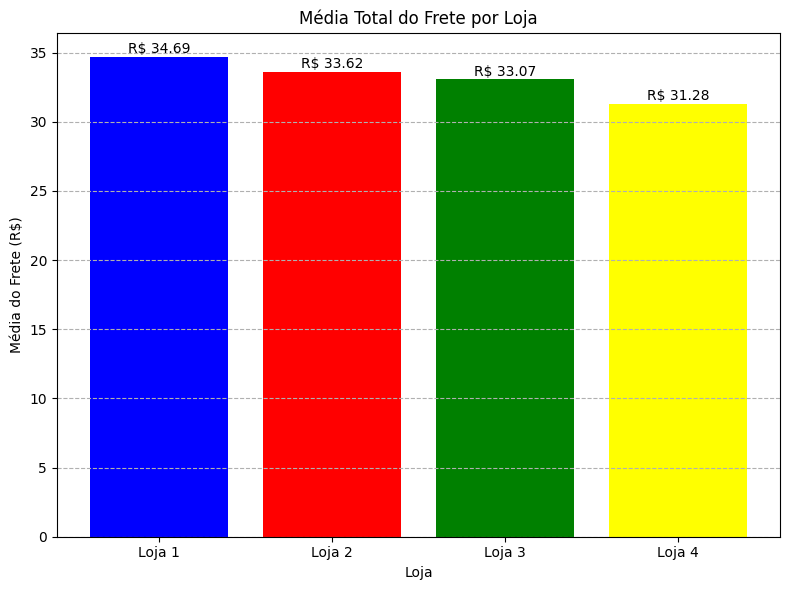

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Calcular a média total do frete por loja
media_frete_por_loja = pd.DataFrame([loja["Frete"].mean().round(2) for loja in lojas], index=nomes_lojas, columns=['Média Total do Frete'])

cores_lojas = ['blue', 'red', 'green', 'yellow']

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(media_frete_por_loja.index, media_frete_por_loja['Média Total do Frete'], color=cores_lojas)
plt.xlabel("Loja")
plt.ylabel("Média do Frete (R$)")
plt.title("Média Total do Frete por Loja")

# Adicionar os valores sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'R$ {yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


In [74]:
import pandas as pd
import plotly.express as px

# Carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

lojas = [pd.read_csv(url) for url in urls]
nomes_lojas = [f"Loja {i+1}" for i in range(len(lojas))]

# Adicionar a coluna 'Loja' e converter datas
for i, loja in enumerate(lojas):
    loja['Loja'] = nomes_lojas[i]
    loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], format="%d/%m/%Y")
    loja["Ano-Mes"] = loja["Data da Compra"].dt.to_period("M").astype(str)  # Convertendo para string

# 🔹 Concatenar dados das lojas para criar um único DataFrame
df_frete_mensal = pd.concat([
    loja.groupby(["Ano-Mes", "Loja"])["Frete"].mean().reset_index() for loja in lojas
])

# 🔹 Criar gráfico com Plotly
fig = px.line(
    df_frete_mensal,
    x="Ano-Mes",
    y="Frete",
    color="Loja",
    markers=True,
    title="Média do Frete Mensal por Loja",
    labels={"Ano-Mes": "Mês e Ano", "Frete": "Média do Frete (R$)"}
)

# 🔹 Melhorando a interatividade do hover
#fig.update_traces(hovertemplate="Loja: %{text}Mês: %{x}Média do Frete: R$ %{y:.2f}", text=df_frete_mensal["Loja"])
fig.update_traces(hovertemplate="Loja: %{data.name}Mês: %{x}%{x}Média do Frete: R$ %{y:.2f}", text=df_frete_mensal["Loja"])

# 🔹 Ajustando layout
fig.update_layout(xaxis_tickangle=-45, height=700)

# 🔹 Exibir gráfico
fig.show()




In [75]:
# Criar lista para armazenar os resultados
frete_por_trimestre = []

for i, loja in enumerate(lojas):
    # Criar coluna de trimestre
    # Criar coluna de trimestre
    loja["Trimestre"] = loja["Data da Compra"].dt.to_period("Q")
    # Converter a coluna 'Trimestre' para string
    loja["Trimestre"] = loja["Trimestre"].astype(str)

    # Calcular distância aproximada da entrega usando a latitude e longitude
    loja["Distancia"] = ((loja["lat"]**2 + loja["lon"]**2)**0.5).round(2)  # Simulação de cálculo de distância

    # Calcular média do frete por trimestre
    frete_trimestre = loja.groupby("Trimestre")[["Frete", "Distancia"]].mean().round(2).reset_index()

    # Adicionar informação da loja
    frete_trimestre["Loja"] = f"Loja {i+1}"

    # Armazenar resultado
    frete_por_trimestre.append(frete_trimestre)

# Concatenar todas as lojas
resultado_frete_trimestre = pd.concat(frete_por_trimestre, ignore_index=True)

# Exibir resultado
display(resultado_frete_trimestre)


,Trimestre,Frete,Distancia,Loja
0,2020Q1,36.46,51.30,Loja 1
1,2020Q2,42.20,52.12,Loja 1
2,2020Q3,38.07,51.60,Loja 1
3,2020Q4,30.45,52.37,Loja 1
4,2021Q1,34.19,51.71,Loja 1
5,2021Q2,33.90,51.22,Loja 1
6,2021Q3,39.23,51.82,Loja 1
7,2021Q4,30.60,51.20,Loja 1
8,2022Q1,32.38,51.67,Loja 1
9,2022Q2,28.31,52.67,Loja 1


In [76]:
import plotly.express as px

fig = px.scatter(resultado_frete_trimestre,
                 x='Distancia',
                 y='Frete',
                 color='Loja',
                 hover_data=['Trimestre', 'Distancia', 'Frete', 'Loja'],
                 title='Correlação entre Frete Médio e Distância da Entrega por Trimestre',
                 labels={'Distancia': 'Distância Aproximada da Entrega',
                         'Frete': 'Média do Frete (R$)'})
fig.update_layout(xaxis_showgrid=True, yaxis_showgrid=True)
fig.show()


In [77]:
import pandas as pd
from IPython.display import display

# Criar lista para armazenar os resultados
correlacao_frete_faturamento = []

for i, loja in enumerate(lojas):
    # Criar coluna de trimestre
    loja["Trimestre"] = loja["Data da Compra"].dt.to_period("Q")
    # Criar coluna de Ano
    loja["Ano"] = loja["Data da Compra"].dt.year

    # Calcular faturamento e frete médio por produto em cada trimestre
    faturamento_frete = loja.groupby(["Trimestre", "Ano", "Produto"]).agg(
        Faturamento=("Preço", "sum"),
        Frete_medio=("Frete", "mean")
    ).reset_index()

    faturamento_frete["Frete_medio"] = faturamento_frete["Frete_medio"].round(2)

    # Calcular porcentagem do frete sobre o faturamento
    faturamento_frete["% Frete/Faturamento"] = ((faturamento_frete["Frete_medio"] / faturamento_frete["Faturamento"]) * 100).round(2)

    # Identificar os 1 produto com maior faturamento e o 1 produto com menor faturamento por trimestre e ano
    top_1 = faturamento_frete.sort_values(["Trimestre", "Ano", "Faturamento"], ascending=[True, True, False]) \
                              .groupby(["Trimestre", "Ano"]) \
                              .head(1) \
                              .reset_index(drop=True)

    bottom_1 = faturamento_frete.sort_values(["Trimestre", "Ano", "Faturamento"], ascending=[True, True, True]) \
                                 .groupby(["Trimestre", "Ano"]) \
                                 .head(1) \
                                 .reset_index(drop=True)

        # Adicionar a informação da loja
    top_1["Loja"] = f"Loja {i+1}"
    bottom_1["Loja"] = f"Loja {i+1}"

    # Armazenar resultado
    correlacao_frete_faturamento.append(top_1)
    correlacao_frete_faturamento.append(bottom_1)

# Concatenar todas as lojas
resultado_correlacao_frete_faturamento = pd.concat(correlacao_frete_faturamento, ignore_index=True)

# Exibir resultado
display(resultado_correlacao_frete_faturamento)



,Trimestre,Ano,Produto,Faturamento,Frete_medio,% Frete/Faturamento,Loja
0,2020Q1,2020,Lava louças,17055.23,90.97,0.53,Loja 1
1,2020Q2,2020,Geladeira,20418.99,154.61,0.76,Loja 1
2,2020Q3,2020,Lava louças,20514.67,99.97,0.49,Loja 1
3,2020Q4,2020,Geladeira,10791.68,145.49,1.35,Loja 1
4,2021Q1,2021,TV Led UHD 4K,12343.17,165.45,1.34,Loja 1
...,...,...,...,...,...,...,...
99,2022Q1,2022,Dinossauro Rex,18.38,0.00,0.00,Loja 4
100,2022Q2,2022,Xadrez de madeira,26.83,1.71,6.37,Loja 4
101,2022Q3,2022,Cubo mágico 8x8,24.12,1.97,8.17,Loja 4
102,2022Q4,2022,Corda de pular,28.34,2.04,7.20,Loja 4


CONCLUSÃO

In [78]:
import pandas as pd
from IPython.display import display

# Criar lista para armazenar os resultados
correlacao_frete_faturamento = []

for i, loja in enumerate(lojas):
    # Criar coluna de Ano
    loja["Ano"] = loja["Data da Compra"].dt.year

    # Calcular faturamento por produto e ano
    faturamento_anual_produto = loja.groupby(["Ano", "Produto"]).agg(
        Faturamento=("Preço", "sum"),
        Frete_medio=("Frete", "mean")
    ).reset_index()

    faturamento_anual_produto["Frete_medio"] = faturamento_anual_produto["Frete_medio"].round(2)
    faturamento_anual_produto["% Frete/Faturamento"] = ((faturamento_anual_produto["Frete_medio"] / faturamento_anual_produto["Faturamento"]) * 100).round(2)

    for ano in sorted(loja['Ano'].unique()):
        dados_ano = faturamento_anual_produto[faturamento_anual_produto['Ano'] == ano]

        if not dados_ano.empty:
            # Encontrar o produto com maior faturamento no ano
            maior_faturamento = dados_ano.sort_values("Faturamento", ascending=False).iloc[0]
            maior_faturamento['Loja'] = f"Loja {i+1}"
            correlacao_frete_faturamento.append(maior_faturamento)

            # Encontrar o produto com menor faturamento no ano (excluindo faturamento zero se houver)
            menor_faturamento = dados_ano[dados_ano['Faturamento'] > 0].sort_values("Faturamento", ascending=True)
            if not menor_faturamento.empty:
                menor_faturamento = menor_faturamento.iloc[0]
                menor_faturamento['Loja'] = f"Loja {i+1}"
                correlacao_frete_faturamento.append(menor_faturamento)
            elif len(dados_ano) > 0: # Se só houver produtos com faturamento zero, pega o primeiro
                menor_faturamento = dados_ano.sort_values("Faturamento", ascending=True).iloc[0]
                menor_faturamento['Loja'] = f"Loja {i+1}"
                correlacao_frete_faturamento.append(menor_faturamento)


# Concatenar todas as lojas
resultado_correlacao_frete_faturamento = pd.DataFrame(correlacao_frete_faturamento)

# Exibir resultado
display(resultado_correlacao_frete_faturamento)


,Ano,Produto,Faturamento,Frete_medio,% Frete/Faturamento,Loja
23,2020,Geladeira,58983.40,149.82,0.25,Loja 1
16,2020,Cubo mágico 8x8,178.90,0.63,0.35,Loja 1
98,2021,TV Led UHD 4K,78924.33,161.53,0.20,Loja 1
66,2021,Corda de pular,131.99,0.76,0.58,Loja 1
125,2022,Geladeira,44319.09,147.30,0.33,Loja 1
121,2022,Dinossauro Rex,277.38,1.58,0.57,Loja 1
197,2023,TV Led UHD 4K,22120.51,169.32,0.77,Loja 1
171,2023,Dinossauro Rex,18.94,1.54,8.13,Loja 1
23,2020,Geladeira,42988.46,142.20,0.33,Loja 2
16,2020,Cubo mágico 8x8,248.57,1.50,0.60,Loja 2


In [79]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Extrair os nomes das lojas únicos
nomes_lojas_unicas = resultado_correlacao_frete_faturamento['Loja'].unique()

# Criar a figura com subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=[f"Loja {i+1}" for i in range(len(nomes_lojas_unicas))])

row_idx, col_idx = 1, 1
for i, nome_loja in enumerate(nomes_lojas_unicas):
    dados_loja = resultado_correlacao_frete_faturamento[resultado_correlacao_frete_faturamento['Loja'] == nome_loja]
    produtos = dados_loja['Produto'].unique()
    max_faturamento_loja = dados_loja['Faturamento'].max()
    y_max = max_faturamento_loja * 1.10  # Adicionando 10% de margem ao máximo

    for produto in produtos:
        dados_produto = dados_loja[dados_loja['Produto'] == produto]
        text_positions = ['top center'] * len(dados_produto)
        for idx, row in dados_produto.iterrows():
            if row['Faturamento'] > 0.8 * y_max:  # Se o ponto estiver nos 20% superiores
                text_positions[dados_produto.index.get_loc(idx)] = 'bottom center'

        fig.add_trace(go.Scatter(x=dados_produto['Ano'], y=dados_produto['Faturamento'],
                                 mode='markers+lines+text',
                                 name=produto,
                                 text=[f'{p:.2f}%' for p in dados_produto['% Frete/Faturamento']],
                                 textposition=text_positions,
                                 textfont=dict(color="black"),
                                 hovertemplate=f'Ano: %{{x}}Faturamento: R$ %{{y:.2f}}% Frete: %{{text}}'),
                      row=row_idx, col=col_idx)

    ###fig.update_yaxes(title_text="Faturamento (R$)", range=[0, y_max], row=row_idx, col=col_idx)
    fig.update_yaxes(title_text="Faturamento (R$)", range=[-5000, y_max], row=row_idx, col=col_idx)

    fig.update_xaxes(
    title_text="Ano",
    tickvals=[2020, 2021, 2022, 2023],  # Define explicitamente quais valores aparecem no eixo
    ticktext=["2020", "2021", "2022", "2023"]  # Define os textos correspondentes
)


    if col_idx == 2:
        col_idx = 1
        row_idx += 1
    else:
        col_idx += 1

fig.update_layout(title_text="Faturamento e Porcentagem do Frete sobre o Faturamento dos Produtos de Maior e Menor Faturamento por Ano e Loja", showlegend=True)
fig.update_xaxes(title_text="Ano")
fig.show()

CONCLUSÃO

Avaliamos as 4 lojas do Sr. João no que tange às 3 métricas solicitadas: faturamento, média de avaliação dos clientes e média de frete mensal.

Também destacamos as categorias mais populares e os produtos mais e menos vendidos, porém consideramos que não servem como métrica para a escolha da loja a ser vendida, conforme enunciado deste desafio.

O objetivo é determinar qual das 4 lojas deve ser vendida a fim de que seu valor seja investido em outros negócios.

Salientamos que o trabalho se atém, unicamente, às métricas solicitadas, não levando em consideração inúmeras variáveis que deveriam ser analisadas em um caso real.

A fim de que a recomendação fosse feita com real segurança, seriam necessários dados contábeis, principalmente os com relação ao lucro, clientes com propensão a inadimplência, histórico do local da loja, perspectivas de crescimento, dentre outras.

Comparando as métricas, temos a seguinte situação:

Loja 1:
Faturamento Total:R$ 1.534.509,12;
Média de avaliação dos clientes: 3,98;
custo médio de frete: 34,69;

Loja 2:
Faturamento Total:R$ 1.488.459,062;
Média de avaliação dos clientes: 4,04;
Custo médio do frete: 33,62;

Loja 3:
Faturamento Total:R$ 1.464.025,03;
Média de avaliação dos clientes: 4,05;
Custo médio do frete: 33,07;

Loja 4:
Faturamento Total: 1.384.497,58;
Média de avaliação dos clientes: 4,00;
Custo médio Frete: 31,28;

Apesar de a loja 1 apresentar o maior faturamento, ela possuia pior avaliação dos cliente e o maior custo médio por frete. Ou seja, não se pode inferir que seja a mais lucrativa.
A loja 4 tem o pior faturamento porém a melhor média de avalição dos clientes e menor custo médio por frete, mesmo assim não é possível inferir que tenha maior lucratividade.

Assim, com base nas informações que pudemos extrair dos dados apresentados, consideramos a análise inconclusiva e solicitariamos outras informações ao Sr. João a fim de que pudéssemos indicar com segurança a loja ideal a ser vendida.

In [80]:
print("Olá Mundo")

Olá Mundo
